In [42]:
# Run these in your terminal in order

#!pip install bertopic

#pip install -r requirements.txt install bertopic

#pip uninstall transformers bertopic
#pip install transformers bertopic

#!pip install spacytextblob
#python -m spacy download en_core_web_sm

In [72]:
import pandas as pd

#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import nltk
from nltk.corpus import stopwords
from nltk import ngrams

import re

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from bertopic import BERTopic

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.cluster import KMeans


In [44]:
#Amado's csv to df 

df_comments = pd.read_csv('/Users/amadouyehara/Desktop/Spring 2024/Applied Analytics & Predictive Modeling/Project 1/opiates_comments6_LIWC.csv')
df_submissions = pd.read_csv('/Users/amadouyehara/Desktop/Spring 2024/Applied Analytics & Predictive Modeling/Project 1/opiates_submissions6_LIWC.csv', low_memory=False)


In [45]:
#Kaily's csv to df

#df_comments = pd.read_csv("C:/Users/Kaily Mejia/Dropbox/Graduate Courses/Applied and Predictive Modeling/Final Project/opiates_comments6_LIWC.csv" )
#df_submissions = pd.read_csv('C:/Users/Kaily Mejia/Dropbox/Graduate Courses/Applied and Predictive Modeling/Final Project/opiates_submissions6_LIWC.csv', low_memory = False)


In [46]:
#Structure of Comments dataset
df_comments.head()

,author,created_utc,score,subreddit,WC,Analytic,Clout,Authentic,Tone,WPS,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,BoofDontShoot,1659067065,1,opiates,5,8.69,50.00,1.00,25.77,2.50,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
1,Busy_Background_195,1659067044,1,opiates,55,32.58,13.76,14.10,1.00,13.75,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,5.45,3.64,0.0
2,Wolf_Double,1659066949,1,opiates,6,1.00,95.20,23.51,99.00,6.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
3,Knowagoraaa,1659066905,1,opiates,39,71.92,60.13,99.00,73.64,13.00,...,0.0,0.0,0.0,0.0,0.0,2.56,0.00,5.13,0.00,0.0
4,Busy_Background_195,1659066875,1,opiates,75,24.37,29.68,14.56,2.41,25.00,...,0.0,0.0,0.0,0.0,0.0,0.00,2.67,4.00,0.00,0.0


In [47]:
#Structure of Submissions dataset
df_submissions.head()

,author,title,created_utc,score,subreddit,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Odd-Pizza-1079,How much tylenol is too much? Asking for a fri...,1.659067e+09,1,opiates,12.0,18.82,79.76,1.79,25.77,...,0.0,0.0,0.00,8.33,0.00,0.00,0.0,0.0,16.67,0.00
1,Global_Face_4708,Gabapentin/Lyrica/Clonidine Through Telehealth?,1.659065e+09,1,opiates,5.0,99.00,50.00,1.00,25.77,...,0.0,0.0,0.00,20.00,0.00,0.00,0.0,0.0,0.00,40.00
2,Bluebeamtwinfn,Opiates prolonging finish/enhancing sex,1.659064e+09,1,opiates,5.0,93.26,50.00,43.37,25.77,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,20.00
3,iLoveLuckiii,Boost your oxy high! &amp; Save money! (USE ON...,1.659063e+09,1,opiates,13.0,82.82,93.79,94.81,99.00,...,0.0,0.0,7.69,0.00,15.38,0.00,0.0,0.0,15.38,7.69
4,Downtown_Syrup4635,IOP Detox while working 9-5??,1.659061e+09,1,opiates,6.0,62.04,50.00,23.51,25.77,...,0.0,0.0,0.00,33.33,0.00,16.67,0.0,0.0,0.00,0.00


In [48]:
#Removing null values
print(len(df_comments))
df_comments = df_comments.dropna()
print(len(df_comments))

print(len(df_submissions))
df_submissions = df_submissions.dropna()
print(len(df_submissions))

1014397
1014397
79676
79674


In [49]:
#only using numerical values for heatmap 
'''
df_comments = df_comments.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_comments.corr()

plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
'''

'\ndf_comments = df_comments.select_dtypes(include=[\'float64\', \'int64\'])\n\ncorrelation_matrix = df_comments.corr()\n\nplt.figure(figsize=(100, 80))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Matrix Heatmap\')\nplt.show()\n'

In [50]:
df_comments = df_comments[['author', 'created_utc','score', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'pronoun', 'ppron', 'ipron', 'adverb', 'negate', 'verb', 'adj', 'compare', 'number', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'percept', 'feel', 'bio', 'health', 'sexual', 'ingest', 'risk', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler']]
df_submissions = df_submissions[['author', 'title', 'created_utc','score', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'pronoun', 'article', 'auxverb', 'adverb', 'conj', 'verb', 'adj', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'percept','feel','cogproc', 'focuspast', 'focuspresent', 'focusfuture', 'work','informal','QMark']]

In [51]:
#Checking for outliers, using min, max, and unique values for comments dataframe

numerical_df_s = df_submissions.select_dtypes(include=['int', 'float'])

# Iterate through each numerical column
for column in numerical_df_s.columns:
    # Calculate min and max range of unique values
    min_val = numerical_df_s[column].min()
    max_val = numerical_df_s[column].max()
    unique_values = numerical_df_s[column].nunique()
    
    # Print the results
    print(f"{column}, -- Min: {min_val}, -- Max: {max_val}, -- Unique Values: {unique_values}")


created_utc, -- Min: 1561436002.0, -- Max: 1659066615.0, -- Unique Values: 79580
WC, -- Min: 0.0, -- Max: 69.0, -- Unique Values: 70
Analytic, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 659
Clout, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 491
Authentic, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 334
Tone, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 120
pronoun, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 384
article, -- Min: 0.0, -- Max: 50.0, -- Unique Values: 219
auxverb, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 306
adverb, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 255
conj, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 256
verb, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 404
adj, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 259
posemo, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 198
negemo, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 196
anx, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 106
anger, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 126
sad, -- 

In [52]:
#Checking for outliers, using min, max, and unique values for comments dataframe

numerical_df_c = df_comments.select_dtypes(include=['int', 'float'])

# Iterate through each numerical column
for column in numerical_df_c.columns:
    # Calculate min and max range of unique values
    min_val = numerical_df_c[column].min()
    max_val = numerical_df_c[column].max()
    unique_values = numerical_df_c[column].nunique()
    
    # Print the results
    print(f"{column}, -- Min: {min_val}, -- Max: {max_val}, -- Unique Values: {unique_values}")

created_utc, -- Min: 1561435211, -- Max: 1659067065, -- Unique Values: 1005848
score, -- Min: -105, -- Max: 217, -- Unique Values: 188
WC, -- Min: 0, -- Max: 1935, -- Unique Values: 1049
Analytic, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 8274
Clout, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 8027
Authentic, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 6890
Tone, -- Min: 0.0, -- Max: 99.0, -- Unique Values: 4364
WPS, -- Min: 0.0, -- Max: 812.0, -- Unique Values: 3860
Sixltr, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 3209
Dic, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 4089
pronoun, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 2843
ppron, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 2394
ipron, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 1628
adverb, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 1624
negate, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 972
verb, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 2716
adj, -- Min: 0.0, -- Max: 100.0, -- Unique Values: 1579
co

In [53]:
#only using numerical values for heatmap 
'''
numerical_df_submissions = df_submissions.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numerical_df_submissions.corr()

plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
'''


'\nnumerical_df_submissions = df_submissions.select_dtypes(include=[\'float64\', \'int64\'])\n\n\ncorrelation_matrix = numerical_df_submissions.corr()\n\nplt.figure(figsize=(100, 80))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Matrix Heatmap\')\nplt.show()\n'

In [54]:
'''
df_emo = df_submissions[['Tone','posemo','negemo']]

correlation_matrix = df_emo.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
'''

'\ndf_emo = df_submissions[[\'Tone\',\'posemo\',\'negemo\']]\n\ncorrelation_matrix = df_emo.corr()\n\nplt.figure(figsize=(10, 8))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Matrix Heatmap\')\nplt.show()\n'

In [55]:
#Converting created_utc to date time and year columns 
def extract_datetime(row):
    timestamp = row['created_utc']
    dt_object = datetime.datetime.fromtimestamp(timestamp)
    return dt_object
    

# Applying the function to each row in the DataFrame and creating a new column
df_submissions['Datetime'] = df_submissions.apply(extract_datetime, axis=1)
df_comments['Datetime'] = df_submissions.apply(extract_datetime, axis=1)

# Dropping the 'created_utc' column
df_submissions.drop('created_utc', axis=1, inplace=True)
df_comments.drop('created_utc', axis=1, inplace=True)

# Inserting the 'Datetime' column
datetime_column_submission = df_submissions.pop('Datetime')
datetime_column_comment = df_comments.pop('Datetime')

df_submissions.insert(2, 'Datetime', datetime_column_submission)
df_comments.insert(1, 'Datetime', datetime_column_comment)

# Define the bins for the seasons based on days of the year
seasons_bins = [0, 80, 172, 264, 355, 366]
seasons_labels = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']

#Addind the values to the season column
df_submissions['season'] = pd.cut(df_submissions['Datetime'].dt.dayofyear, bins=seasons_bins, labels=seasons_labels, ordered=False)
df_comments['season'] = pd.cut(df_comments['Datetime'].dt.dayofyear, bins=seasons_bins, labels=seasons_labels, ordered=False)

df_submissions.insert(3, 'season', df_submissions.pop('season'))
df_comments.insert(2, 'season', df_comments.pop('season'))

df_submissions.dropna()
df_comments.dropna()

,author,Datetime,season,score,WC,Analytic,Clout,Authentic,Tone,WPS,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,BoofDontShoot,2022-07-28 23:50:15,Summer,1,5,8.69,50.00,1.00,25.77,2.50,...,0.00,0.00,0.00,0.00,20.00,0.00,20.00,0.00,0.00,0.0
1,Busy_Background_195,2022-07-28 23:22:43,Summer,1,55,32.58,13.76,14.10,1.00,13.75,...,0.00,0.00,0.00,1.82,7.27,3.64,1.82,0.00,0.00,0.0
2,Wolf_Double,2022-07-28 23:06:11,Summer,1,6,1.00,95.20,23.51,99.00,6.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
3,Knowagoraaa,2022-07-28 22:49:43,Summer,1,39,71.92,60.13,99.00,73.64,13.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,Busy_Background_195,2022-07-28 22:21:57,Summer,1,75,24.37,29.68,14.56,2.41,25.00,...,0.00,0.00,0.00,0.00,2.67,1.33,1.33,1.33,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79671,Last_Confidence6221,2019-06-25 00:32:36,Summer,1,5,1.00,99.00,43.37,25.77,5.00,...,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.0
79672,AutoModerator,2019-06-25 00:32:34,Summer,1,214,61.61,96.91,3.73,69.79,35.67,...,0.00,0.93,0.00,0.00,7.48,0.00,7.48,0.00,0.00,0.0
79673,abeksR,2019-06-25 00:23:52,Summer,1,7,99.00,50.00,1.00,25.77,7.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
79674,Classic_Paramedic_86,2019-06-25 00:17:35,Summer,1,731,47.71,58.12,83.37,10.30,21.50,...,0.55,0.14,0.55,0.55,0.55,0.27,0.14,0.00,0.14,0.0


In [56]:
df_comments

,author,Datetime,season,score,WC,Analytic,Clout,Authentic,Tone,WPS,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,BoofDontShoot,2022-07-28 23:50:15,Summer,1,5,8.69,50.00,1.00,25.77,2.50,...,0.0,0.00,0.00,0.00,20.00,0.00,20.00,0.00,0.0,0.0
1,Busy_Background_195,2022-07-28 23:22:43,Summer,1,55,32.58,13.76,14.10,1.00,13.75,...,0.0,0.00,0.00,1.82,7.27,3.64,1.82,0.00,0.0,0.0
2,Wolf_Double,2022-07-28 23:06:11,Summer,1,6,1.00,95.20,23.51,99.00,6.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,Knowagoraaa,2022-07-28 22:49:43,Summer,1,39,71.92,60.13,99.00,73.64,13.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,Busy_Background_195,2022-07-28 22:21:57,Summer,1,75,24.37,29.68,14.56,2.41,25.00,...,0.0,0.00,0.00,0.00,2.67,1.33,1.33,1.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014392,Virgowitch,NaT,NaN,2,5,1.00,50.00,43.37,99.00,5.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1014393,DrewSkii1010,NaT,NaN,1,9,99.00,13.32,58.07,99.00,9.00,...,0.0,11.11,0.00,0.00,11.11,0.00,11.11,0.00,0.0,0.0
1014394,erischilde,NaT,NaN,1,104,7.27,89.42,63.54,43.27,10.40,...,0.0,0.00,0.00,0.00,2.88,1.92,0.00,0.00,0.0,0.0
1014395,dingobaybees,NaT,NaN,3,44,4.01,91.35,85.21,25.77,11.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [57]:
df_submissions.head()

,author,title,Datetime,season,score,WC,Analytic,Clout,Authentic,Tone,...,sad,percept,feel,cogproc,focuspast,focuspresent,focusfuture,work,informal,QMark
0,Odd-Pizza-1079,How much tylenol is too much? Asking for a fri...,2022-07-28 23:50:15,Summer,1,12.0,18.82,79.76,1.79,25.77,...,0.0,0.0,0.0,16.67,0.0,16.67,0.0,0.00,0.0,8.33
1,Global_Face_4708,Gabapentin/Lyrica/Clonidine Through Telehealth?,2022-07-28 23:22:43,Summer,1,5.0,99.00,50.00,1.00,25.77,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,20.00
2,Bluebeamtwinfn,Opiates prolonging finish/enhancing sex,2022-07-28 23:06:11,Summer,1,5.0,93.26,50.00,43.37,25.77,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
3,iLoveLuckiii,Boost your oxy high! &amp; Save money! (USE ON...,2022-07-28 22:49:43,Summer,1,13.0,82.82,93.79,94.81,99.00,...,0.0,0.0,0.0,7.69,0.0,15.38,0.0,0.00,0.0,0.00
4,Downtown_Syrup4635,IOP Detox while working 9-5??,2022-07-28 22:21:57,Summer,1,6.0,62.04,50.00,23.51,25.77,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,16.67,0.0,33.33


In [58]:
#Natural Language Processing for Title columns 

nltk.download('stopwords')
swords = stopwords.words('english')
#Removing the word 'not' to avoid consfusion from negative to positive sentiment
swords.remove('not')

df_submissions['title'] = df_submissions['title'].apply(lambda x: re.sub(r'[^a-zA-Z\d\s.]', '', x.lower()))
df_submissions['title'] = df_submissions['title'].apply(lambda x: x.replace('.', ' '))
df_submissions['title'] = df_submissions['title'].apply(lambda x: ' '.join([t for t in x.split(' ') if (t not in swords) and len(t) > 1]))
df_submissions['title'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amadouyehara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    much tylenol much asking friend actually
1        gabapentinlyricaclonidine telehealth
2      opiates prolonging finishenhancing sex
3           boost oxy high amp save money use
4                        iop detox working 95
Name: title, dtype: object

In [59]:
docs = df_submissions['title'].tolist()

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

print(topic_model.get_topic_info())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

      Topic  Count                                        Name  \
0        -1  25090                   -1_took_opiates_take_feel   
1         0    422                 0_suboxone_wait_suboxon_8mg   
2         1    393         1_addiction_addict_addicted_addicts   
3         2    345            2_detox_detoxing_home_detoxrehab   
4         3    317               3_opioids_opioid_opiods_opiod   
...     ...    ...                                         ...   
1425   1424     10  1424_dihydrocodeine_1215_recreation_medium   
1426   1425     10                   1425_3day_finessed_7th_wd   
1427   1426     10       1426_precipitated_freaked_noon_sister   
1428   1427     10           1427_norco_knee_promethazine_tram   
1429   1428     10           1428_supeudol_oblong_asprin_folks   

                                         Representation  \
0     [took, opiates, take, feel, fentanyl, heroin, ...   
1     [suboxone, wait, suboxon, 8mg, blocking, 8mg2m...   
2     [addiction, addict, addi

In [60]:
topic_model.visualize_barchart(top_n_topics=9, n_words=10, width=650, height=650)

In [61]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

df_submissions['title_polarity'] = df_submissions['title'].apply(lambda x: round((nlp(x))._.blob.polarity, 2))
df_submissions

,author,title,Datetime,season,score,WC,Analytic,Clout,Authentic,Tone,...,percept,feel,cogproc,focuspast,focuspresent,focusfuture,work,informal,QMark,title_polarity
0,Odd-Pizza-1079,much tylenol much asking friend actually,2022-07-28 23:50:15,Summer,1,12.0,18.82,79.76,1.79,25.77,...,0.00,0.00,16.67,0.00,16.67,0.00,0.00,0.00,8.33,0.13
1,Global_Face_4708,gabapentinlyricaclonidine telehealth,2022-07-28 23:22:43,Summer,1,5.0,99.00,50.00,1.00,25.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00
2,Bluebeamtwinfn,opiates prolonging finishenhancing sex,2022-07-28 23:06:11,Summer,1,5.0,93.26,50.00,43.37,25.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,iLoveLuckiii,boost oxy high amp save money use,2022-07-28 22:49:43,Summer,1,13.0,82.82,93.79,94.81,99.00,...,0.00,0.00,7.69,0.00,15.38,0.00,0.00,0.00,0.00,0.16
4,Downtown_Syrup4635,iop detox working 95,2022-07-28 22:21:57,Summer,1,6.0,62.04,50.00,23.51,25.77,...,0.00,0.00,0.00,0.00,0.00,0.00,16.67,0.00,33.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79671,Kriskross88,started nodding front friend last night kept s...,2019-06-25 00:32:36,Summer,6,38.0,28.39,14.62,99.00,1.00,...,5.26,2.63,13.16,5.26,15.79,2.63,2.63,2.63,0.00,-0.26
79672,Jupiterjigs1,best way use oxy 30s,2019-06-25 00:32:34,Summer,3,6.0,99.00,50.00,23.51,99.00,...,0.00,0.00,16.67,0.00,16.67,0.00,0.00,0.00,16.67,1.00
79673,FBIintern,not many homosexual use opiates,2019-06-25 00:23:52,Summer,0,9.0,1.00,1.00,98.01,25.77,...,0.00,0.00,33.33,0.00,22.22,0.00,0.00,0.00,11.11,-0.25
79674,AutomaticBrick3,stamp bags review,2019-06-25 00:17:35,Summer,0,3.0,93.26,50.00,1.00,25.77,...,0.00,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.00


In [62]:
#Main Task #1: Random Forest Calssifier to predict scores based off of positive and negative emotion

#Submissions

# Convert 'score' column to numeric, setting errors='coerce' to convert non-numeric values to NaN
# Then drop rows with NaN in 'score'
df_submissions['score'] = pd.to_numeric(df_submissions['score'], errors='coerce')
df_submissions.dropna(subset=['score'], inplace=True)

#Scores above the median as 'higher'
median_score = df_submissions['score'].median()
df_submissions['higher_score'] = (df_submissions['score'] > median_score).astype(int)
print('Median Score:', median_score)


# Splitting the data
X = df_submissions[['posemo', 'negemo','title_polarity']]
y = df_submissions['higher_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Accruacy Score 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Median Score: 1.0
Accuracy: 0.9189206149984311


In [63]:
#Feature Importance
features = ['posemo', 'negemo','title_polarity']
feature_importances = clf.feature_importances_

# Mapping feature importances
feature_importance_dict = dict(zip(features, feature_importances))

print('Feature Importances:')
for feature, importance in feature_importance_dict.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances:
posemo: 0.2200
negemo: 0.2491
title_polarity: 0.5309


In [64]:
#Main Task #1: Random Forest Calssifier to predict scores based off of positive and negative emotion

#Comments

# Convert 'score' column to numeric, setting errors='coerce' to convert non-numeric values to null
# Then drop rows with NaN in 'score'
df_comments['score'] = pd.to_numeric(df_comments['score'], errors='coerce')
df_comments.dropna(subset=['score'], inplace=True)

#Scores above the median as 'higher'
median_score = df_comments['score'].median()
df_comments['higher_score'] = (df_comments['score'] > median_score).astype(int)
print('Median Score:', median_score)


# Splitting the data
X = df_comments[['posemo', 'negemo']]
y = df_comments['higher_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Accruacy Score 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Median Score: 1.0
Accuracy: 0.8260203075709779


In [65]:
#Feature Importance
features = ['posemo', 'negemo']
feature_importances = clf.feature_importances_

# Mapping feature importances
feature_importance_dict = dict(zip(features, feature_importances))

print('Feature Importances:')
for feature, importance in feature_importance_dict.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances:
posemo: 0.5003
negemo: 0.4997


In [66]:
#df_submissions.to_csv('df_submissions.csv', index=False)

In [96]:
'''
# Normalizing the numeric columns
scaler = MinMaxScaler()
df_submissions[['score_normalized', 'posemo_normalized', 'negemo_normalized', 'title_polarity_normalized']] = scaler.fit_transform(df_submissions[['score', 'posemo', 'negemo', 'title_polarity']])
'''
# Encoding the season column
encoder = OneHotEncoder()
season_encoded = encoder.fit_transform(df_submissions[['season']]).toarray()
season_encoded_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['season']))

# Combining the normalized and encoded features
features_df_sub = pd.concat([df_submissions[['score', 'posemo', 'negemo', 'title_polarity']], season_encoded_df], axis=1)
features_df_sub.head()

,score,posemo,negemo,title_polarity,season_Fall,season_Spring,season_Summer,season_Winter
0,1.0,0.00,0.0,0.13,0.0,0.0,1.0,0.0
1,1.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0
2,1.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0
3,1.0,7.69,0.0,0.16,0.0,0.0,1.0,0.0
4,1.0,0.00,0.0,0.00,0.0,0.0,1.0,0.0


In [97]:
features_df_sub = features_df_sub.dropna()

In [85]:
df_submissions = df_submissions.dropna()

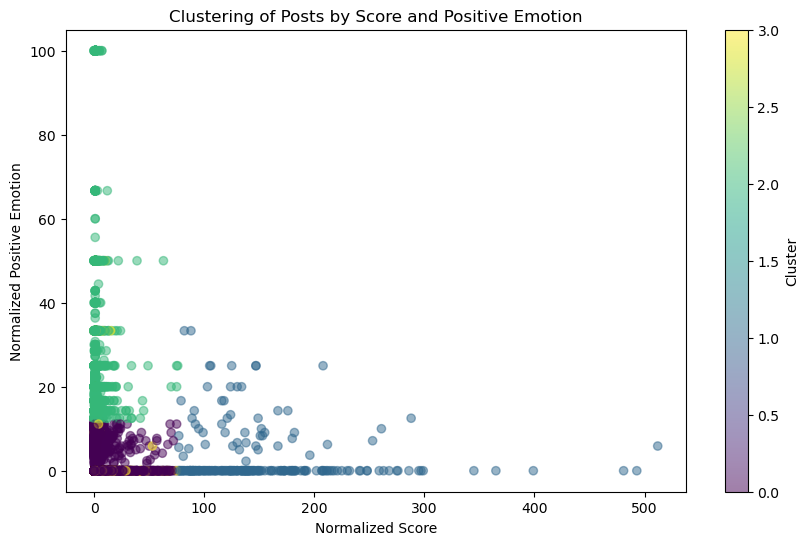

In [100]:
'''
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(features_df_sub)

# Adding cluster labels to the dataframe
features_df_sub['Cluster'] = clusters


# Plotting the clusters
plt.figure(figsize=(10, 6), facecolor='white')
plt.scatter(features_df_sub['Datetime'], df_submissions['score'], c=features_df_sub['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Cluster Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Score')
plt.colorbar(label='Cluster')
plt.show()
print('Clustering complete. Clusters are visualized based on the score over time.')
'''


In [109]:
'''
# Visualizing the clusters using a scatter plot

season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'yellow', 'Fall': 'red'}
season_color_values = features_df_sub['season'].map(season_colors)
plt.figure(figsize=(10, 6), facecolor='white')
plt.scatter(features_df_sub['posemo'], features_df_sub['negemo'], c=features_df_sub['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters of Posts Based on Normalized Emotional Scores')
plt.xlabel('Normalized Positive Emotion Score')
plt.ylabel('Normalized Negative Emotion Score')
plt.colorbar(label='Cluster')
plt.show()
print('Scatter plot of clusters based on normalized emotional scores displayed.')
'''

"\n# Visualizing the clusters using a scatter plot\n\nseason_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'yellow', 'Fall': 'red'}\nseason_color_values = features_df_sub['season'].map(season_colors)\nplt.figure(figsize=(10, 6), facecolor='white')\nplt.scatter(features_df_sub['posemo'], features_df_sub['negemo'], c=features_df_sub['Cluster'], cmap='viridis', alpha=0.5)\nplt.title('Clusters of Posts Based on Normalized Emotional Scores')\nplt.xlabel('Normalized Positive Emotion Score')\nplt.ylabel('Normalized Negative Emotion Score')\nplt.colorbar(label='Cluster')\nplt.show()\nprint('Scatter plot of clusters based on normalized emotional scores displayed.')\n"